In [1]:
import os
import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

train_audio_path = '../data/'
set1_labels = ["yes", "no", "up", "down", "left"]
set2_labels = ["house", "five", "six", "tree", "zero"]

In [2]:
labels = set2_labels  # Second set

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

house
five
six
tree
zero


In [3]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

Parametry dla modelu uczonego na ograniczonym zbiorze testowym 
bez transfer learning


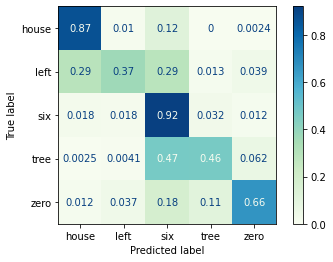

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1248
           1       0.85      0.37      0.51      1732
           2       0.52      0.92      0.66      1759
           3       0.67      0.46      0.55      1217
           4       0.88      0.66      0.76      1763

    accuracy                           0.66      7719
   macro avg       0.71      0.66      0.65      7719
weighted avg       0.72      0.66      0.65      7719



In [5]:
model = load_model('bestModel_set2_20_tlOff.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego na ograniczonym zbiorze testowym \nbez transfer learning")
plt.show()
print(report)

Parametry dla modelu uczonego na ograniczonym zbiorze testowym 
z wykorzystaniem transfer learning


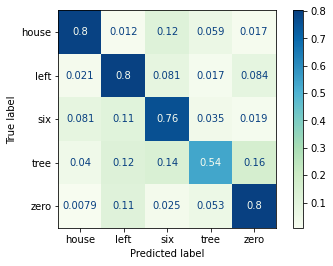

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1248
           1       0.72      0.80      0.75      1732
           2       0.73      0.76      0.74      1759
           3       0.72      0.54      0.61      1217
           4       0.78      0.80      0.79      1763

    accuracy                           0.75      7719
   macro avg       0.75      0.74      0.74      7719
weighted avg       0.75      0.75      0.75      7719



In [6]:
model = load_model('bestModel_set2_20_tlOn.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego na ograniczonym zbiorze testowym \nz wykorzystaniem transfer learning, z reinicjalizacją wag w ostatnich trzech warstwach.")
plt.show()
print(report)

Parametry dla modelu uczonego na ograniczonym zbiorze testowym 
z wykorzystaniem transfer learning, bez reinicjalizacji wag


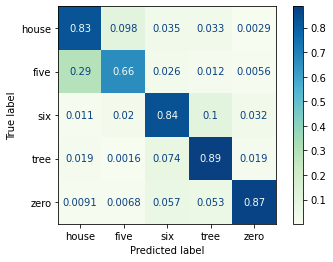

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1729
           1       0.79      0.66      0.72      1248
           2       0.84      0.84      0.84      1759
           3       0.76      0.89      0.82      1217
           4       0.94      0.87      0.91      1763

    accuracy                           0.82      7716
   macro avg       0.82      0.82      0.82      7716
weighted avg       0.83      0.82      0.82      7716



In [4]:
model = load_model('bestModel_set2_20_tlOn_noReinit.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego na ograniczonym zbiorze testowym \nz wykorzystaniem transfer learning, bez reinicjalizacji wag")
plt.show()
print(report)

In [7]:
labels = set1_labels  # First set

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left


In [8]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

Parametry dla modelu uczonego w proporcjach 20/80 (treningowy/testowy)


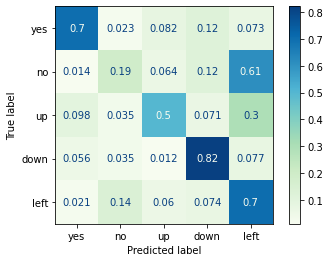

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1722
           1       0.45      0.19      0.27      1732
           2       0.69      0.50      0.58      1678
           3       0.67      0.82      0.74      1650
           4       0.40      0.70      0.51      1726

    accuracy                           0.58      8508
   macro avg       0.60      0.58      0.57      8508
weighted avg       0.60      0.58      0.57      8508



In [9]:
model = load_model('bestModel_set1_20.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego w proporcjach 20/80 (treningowy/testowy)")
plt.show()
print(report)

Parametry dla modelu uczonego w proporcjach 40/60 (treningowy/testowy)


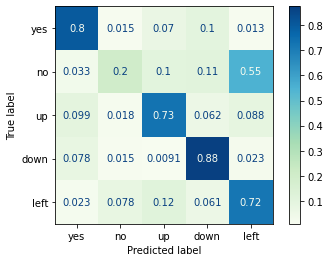

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1722
           1       0.61      0.20      0.30      1732
           2       0.70      0.73      0.72      1678
           3       0.71      0.88      0.79      1650
           4       0.52      0.72      0.60      1726

    accuracy                           0.66      8508
   macro avg       0.67      0.67      0.64      8508
weighted avg       0.66      0.66      0.64      8508



In [11]:
model = load_model('bestModel_set1_40.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego w proporcjach 40/60 (treningowy/testowy)")
plt.show()
print(report)

Parametry dla modelu uczonego w proporcjach 60/40 (treningowy/testowy)


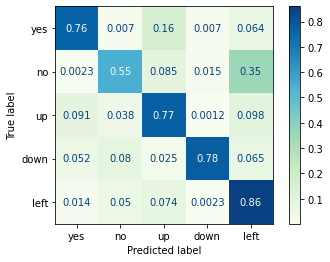

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       861
           1       0.76      0.55      0.64       866
           2       0.68      0.77      0.73       839
           3       0.97      0.78      0.86       825
           4       0.60      0.86      0.71       863

    accuracy                           0.74      4254
   macro avg       0.77      0.74      0.74      4254
weighted avg       0.77      0.74      0.74      4254



In [13]:
model = load_model('bestModel_set1_60.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.4,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego w proporcjach 60/40 (treningowy/testowy)")
plt.show()
print(report)

Parametry dla modelu uczonego w proporcjach 80/20 (treningowy/testowy)


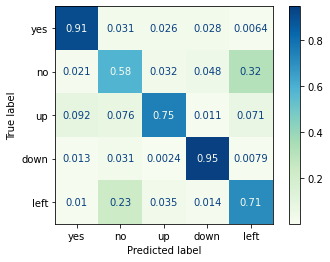

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1722
           1       0.62      0.58      0.60      1732
           2       0.88      0.75      0.81      1678
           3       0.90      0.95      0.92      1650
           4       0.64      0.71      0.67      1726

    accuracy                           0.78      8508
   macro avg       0.78      0.78      0.78      8508
weighted avg       0.78      0.78      0.78      8508



In [15]:
model = load_model('bestModel_set1_80.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

print("Parametry dla modelu uczonego w proporcjach 80/20 (treningowy/testowy)")
plt.show()
print(report)